In [1]:
%matplotlib inline

In [2]:
import pandas as pd
from functools import reduce
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from matplotlib import rc
import numpy as np
from datetime import datetime
from functools import reduce
import re


rc('font', family='AppleGothic')

In [46]:
data = pd.read_csv('new_mashed_up.csv')
district = pd.read_csv('site_no.csv')

/Users/heeseok/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [55]:
district.tail()

,district,site_no
22,용산구,22
23,은평구,23
24,종로구,24
25,중구,25
26,중랑구,26


In [78]:
stop_words=['안녕하십니까','현재','청장','사용','대하','고객','문제','저희','제가','의견','행복','주변',
            '하신','가정','서울','민원','조치','주시','전달','본인','관심','안녕','사람','시민','하오',
            '부탁','첨부파일','관련','경우','해당','사항','내용','문의','불편','진행','피해','요청','확인',
            '이용','설치','개최','주민','처리','나라','생각','여부','연락','주신','구정','구청','시간','주민',
            '대한','대해','하십니까','다시','접수','첨부파일','선생님','아래','애정','관리','또한','주심','깊이',
            '위해','시행','성심껏','실시','말씀','먼저','성심','성의껏','상황','발생','현장','이후']

In [79]:
stop_words.extend([_[:-1] for _ in district.district[2:]])

In [80]:
stop_words.extend([_ for _ in district.district[2:]])

In [81]:
def visualize(location,data):
    now = datetime.now()
    #지역에 해당하는 site_no
    site_no = np.where(district.district==location)[0][0]
    
    #최근 3개월
    date_list = []
    y = now.year
    m = now.month
    
    while len(date_list)<3:
        if m>0:
            date_list.append(str(y)+'-'+'{0:02d}'.format(m%12))
        elif m==0:
            y_ = y-1
            date_list.append(str(y_)+'-'+'{0:02d}'.format(m+12))
        else:
            y_ = y-1
            date_list.append(str(y_)+'-'+'{0:02d}'.format(m%12))
        m -=1
        
    data_ = pd.concat([data[[_.startswith(date_list[i]) for _ in data.date]] for i in range(len(date_list))],axis=0)
    data_ = data_[data_.site_no==site_no]        
    
    collection_ = data_.controlled_collection
    collection_ = reduce((lambda x,y :x+' '+y),collection_)
    
    wordcloud = WordCloud(stopwords=stop_words,font_path='/Library/Fonts/AppleGothic.ttf',background_color='white').generate(collection_)
    plt.figure(figsize=(12,12))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.rcParams['axes.unicode_minus'] = False
    plt.axis('off')
    plt.show()
    
    return None

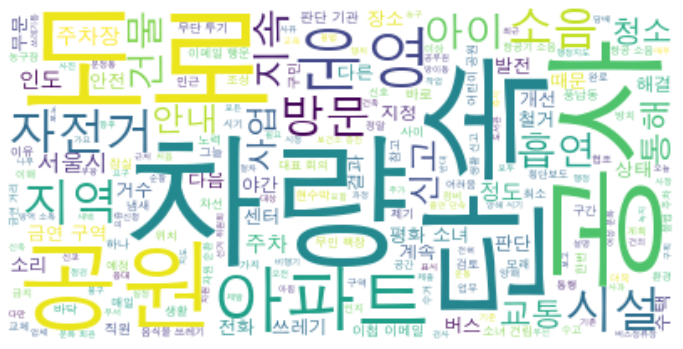

In [83]:
visualize('송파구',data)

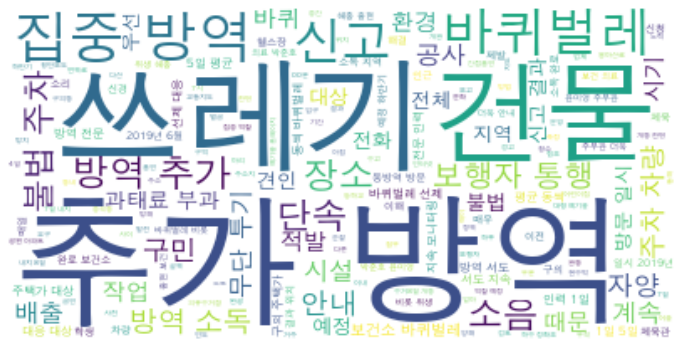

In [84]:
visualize('광진구',data)

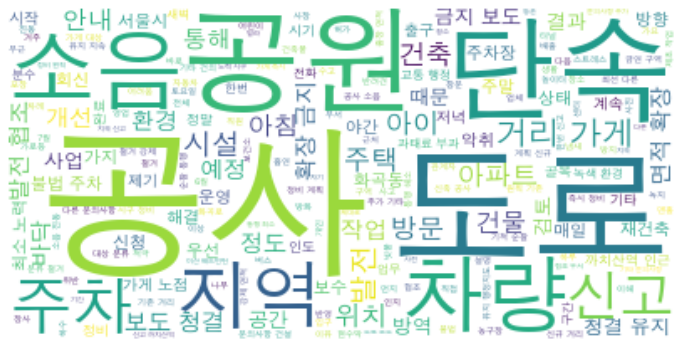

In [85]:
visualize('강북구',data)